<a href="https://colab.research.google.com/github/Avantika-seth/GRIP_SPARKS_FOUNDATION_INTERNSHIP_TASK/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**|| Internship @ The Sparks Foundation ||**

**|| Domain: Data Science and Business Analytics ||**

**|| Author: Avantika Verma ||**

**|| Task 1: To Predict the Percentage of marks of the students based on the number of study hours using Supervised Machine Learning||**

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.linear_model import LinearRegression  

**1. Reading the data from source**

In [ ]:
# Reading the data
data = pd.read_csv("http://bit.ly/w-data")
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [ ]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# check if there any null value in the dataset
data.isnull == True

False

**2. Checking the relation between the Independent and target variable**

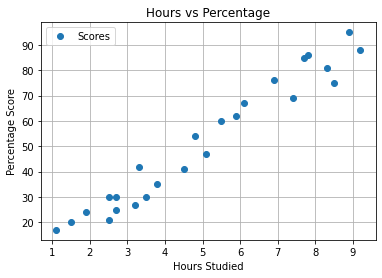

In [ ]:
# Visualising the data
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.


**3.Preparing the data**

In [ ]:
#dividing the data into X and Y

x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

**4.Train-Test Split**


Here Split the  data into training and testing sets by importing train_test_split from sklearn.model_selection library.

In [ ]:
#Splitting the data

from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [ ]:
x_train.shape

(20, 1)

In [ ]:
x_test.shape

(5, 1)

In [ ]:
y_test.shape

(5,)

In [ ]:
y_train.shape

(20,)

Splitting the data into training and testing sets,and training the algorithm. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
regr = LinearRegression()  
regr.fit(x_train, y_train) 

print("Training complete.")


Training complete.


**5. Plotting the line of Regression**

Visualize the base fit line of regression


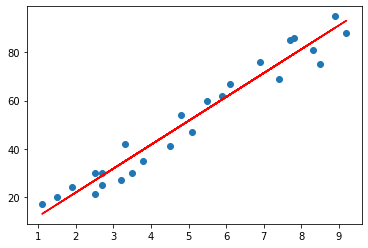

In [ ]:
# Plotting the regression 

line = regr.coef_*x+regr.intercept_

# Plotting for the test data

plt.scatter(x, y)
plt.plot(x, line,color='red');
plt.show()

**6. Making Predictions**

Test the model by making some prediction

In [ ]:
#testing data
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
y_pred = regr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**7. Comparing actual Result to the predicted model Result**

In [ ]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# Estimating training and test score

print("Training Score:",regr.score(x_train,y_train))
print("Test Score:",regr.score(x_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


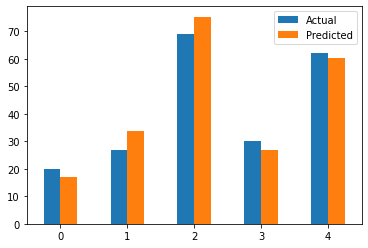

In [ ]:
# Plotting the Bar graph to depict the differrence btw the actual value and pridicted value

df= pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.plot(kind= 'bar')
plt.xticks(rotation=0)
plt.show()

**Predicted Scores If A Student Studies for 9.25 Hours**

In [ ]:
hours = 9.25
test = np.array([hours])
test = test.reshape(1,-1)
own_pred = regr.predict(test)

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**8. Evaluating the Model**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


**CONCLUSION**

**So this Task 1 about the Prediction using Supervised ML and according to regression model if the students studies for 9.25 hours a day then he/she would likely score 93.69%** 